<a href="https://colab.research.google.com/github/michelymarianocs/Projetos-Data-Science/blob/main/Analisando_os_Dados_do_Airbnb_Seattle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Seattle*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de *Seattle*, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/wa/seattle/2021-12-20/visualisations/listings.csv")


## Análise dos Dados


**Dicionário das variáveis**

* id - número de identificação de cada imóvel
* name - nome do imóvel
* host_id - número de identificação do anfitrião
* host_name - nome do anfitrião
* neighbourhood_group - conjunto de bairros
* neighbourhood - nome do bairro
* latitude - localização latitudinal do imóvel
* longitude - localização longitudianl do imóvel
* room_type - tipo de imóvel
* price - preço da noite de estadia no imóvel
* minimum_nights - quantidade mínima de noites no imóvel
* number_of_reviews - quantidade do reviews sobre o imóvel
* last_review - data do último review mais recente
* reviews_per_month - quantidade de reviews mensais
* calculated_host_listings_count - quantidade de imóveis que o anfitrião tem para locação
* availability_365 - quantidade de dias em que o imóvel fica disponível dentro de 365 dias
* number_of_reviews_ltm - quantidade de reviews nos últimos 12 meses
* license - número da licença do imóvel

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2318,Casa Madrona - Urban Oasis 1 block from the park!,2536,Megan,Central Area,Madrona,47.61094,-122.29286,Entire home/apt,333,7,36,2021-11-30,0.22,1,332,4,STR-OPLI-19-002837
1,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.65444,-122.33629,Entire home/apt,99,3,157,2021-09-14,1.04,2,0,8,str-opli-19-002622
2,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.55017,-122.31937,Private room,62,2,154,2021-10-16,1.11,8,365,6,STR-OPLI-19-003039
3,9531,The Adorable Sweet Orange Craftsman,31481,Cassie,West Seattle,Fairmount Park,47.55495,-122.38663,Entire home/apt,185,2,54,2021-12-07,0.45,2,269,13,STR-OPLI-19-002182
4,9534,The Coolest Tangerine Dream MIL!,31481,Cassie,West Seattle,Fairmount Park,47.55627,-122.38607,Entire home/apt,145,5,59,2021-10-15,0.49,2,202,5,STR-OPLI-19-002182


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
df.info()
# verificar as 5 primeiras entradas do dataset
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4686 entries, 0 to 4685
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4686 non-null   int64  
 1   name                            4686 non-null   object 
 2   host_id                         4686 non-null   int64  
 3   host_name                       4686 non-null   object 
 4   neighbourhood_group             4686 non-null   object 
 5   neighbourhood                   4686 non-null   object 
 6   latitude                        4686 non-null   float64
 7   longitude                       4686 non-null   float64
 8   room_type                       4686 non-null   object 
 9   price                           4686 non-null   int64  
 10  minimum_nights                  4686 non-null   int64  
 11  number_of_reviews               4686 non-null   int64  
 12  last_review                     39

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2318,Casa Madrona - Urban Oasis 1 block from the park!,2536,Megan,Central Area,Madrona,47.61094,-122.29286,Entire home/apt,333,7,36,2021-11-30,0.22,1,332,4,STR-OPLI-19-002837
1,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.65444,-122.33629,Entire home/apt,99,3,157,2021-09-14,1.04,2,0,8,str-opli-19-002622
2,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.55017,-122.31937,Private room,62,2,154,2021-10-16,1.11,8,365,6,STR-OPLI-19-003039
3,9531,The Adorable Sweet Orange Craftsman,31481,Cassie,West Seattle,Fairmount Park,47.55495,-122.38663,Entire home/apt,185,2,54,2021-12-07,0.45,2,269,13,STR-OPLI-19-002182
4,9534,The Coolest Tangerine Dream MIL!,31481,Cassie,West Seattle,Fairmount Park,47.55627,-122.38607,Entire home/apt,145,5,59,2021-10-15,0.49,2,202,5,STR-OPLI-19-002182


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)


license                           23.644900
reviews_per_month                 15.407597
last_review                       15.407597
name                               0.000000
number_of_reviews_ltm              0.000000
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
minimum_nights                     0.000000
id                                 0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_name                          0.000000
host_id                            0.000000
price                              0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1f88432d0>,
      dtype=object)

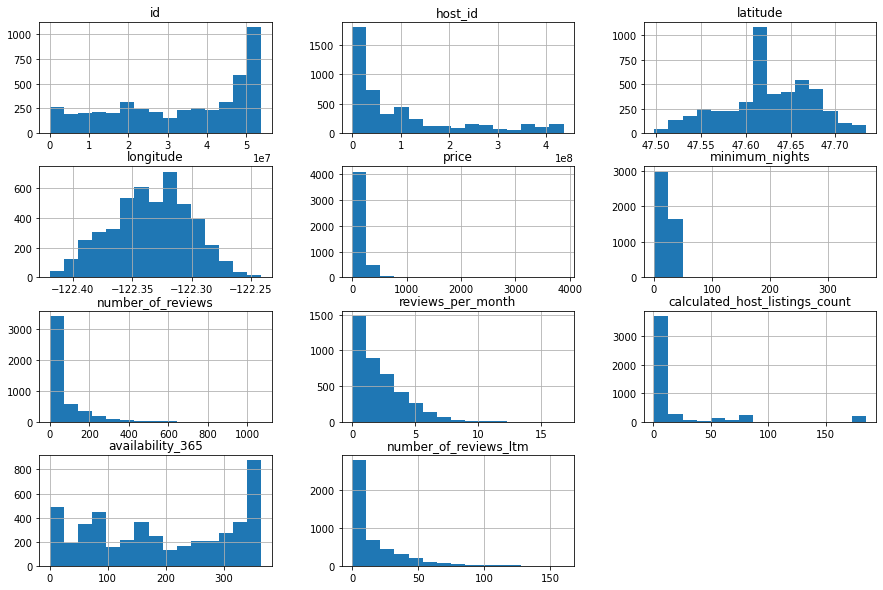

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10))


In [ ]:
#verificando se existem outliers
df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,4686.000000,4686.000000,4686.000000,3964.000000,4686.000000,4686.000000,4686.000000
mean,158.667947,13.771660,62.936406,2.217606,17.422108,194.098165,15.071490
std,146.632730,20.605269,96.767237,1.919006,39.604424,124.138991,20.562439
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,86.000000,2.000000,3.000000,0.680000,1.000000,79.000000,1.000000
50%,125.000000,3.000000,22.000000,1.730000,2.000000,179.000000,6.000000
75%,188.750000,30.000000,82.000000,3.230000,8.000000,321.000000,23.000000
max,3887.000000,365.000000,1071.000000,16.760000,185.000000,365.000000,160.000000


### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna 'price'
df.price.mean()


158.66794707639778

### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
corr = df[['price','minimum_nights','number_of_reviews','number_of_reviews_ltm','reviews_per_month',
           'calculated_host_listings_count','availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.054617,-0.104841,-0.091205,-0.120010,-0.029882,0.071248
minimum_nights,0.054617,1.000000,-0.196169,-0.355775,-0.405410,0.235658,0.179117
number_of_reviews,-0.104841,-0.196169,1.000000,0.607932,0.544746,-0.230290,-0.114362
number_of_reviews_ltm,-0.091205,-0.355775,0.607932,1.000000,0.750652,-0.235159,-0.124469
reviews_per_month,-0.120010,-0.405410,0.544746,0.750652,1.000000,-0.212499,-0.101134
calculated_host_listings_count,-0.029882,0.235658,-0.230290,-0.235159,-0.212499,1.000000,0.261209
availability_365,0.071248,0.179117,-0.114362,-0.124469,-0.101134,0.261209,1.000000


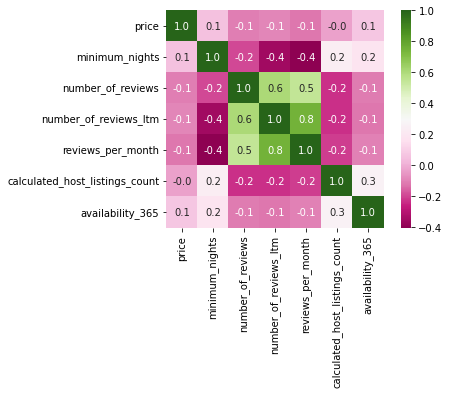

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='PiYG', fmt='.1f', square=True, linecolor='white', annot=True)


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    3882
Private room        750
Shared room          51
Hotel room            3
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts()/df.shape[0] * 100


Entire home/apt    82.842510
Private room       16.005122
Shared room         1.088348
Hotel room          0.064020
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Harrison/Denny-Blaine    413.380952
West Queen Anne          253.584270
Briarcliff               244.545455
Broadview                234.217391
Sunset Hill              216.225806
Madrona                  210.517241
Portage Bay              208.714286
Alki                     206.365079
North Queen Anne         197.456790
East Queen Anne          194.305556
Name: price, dtype: float64

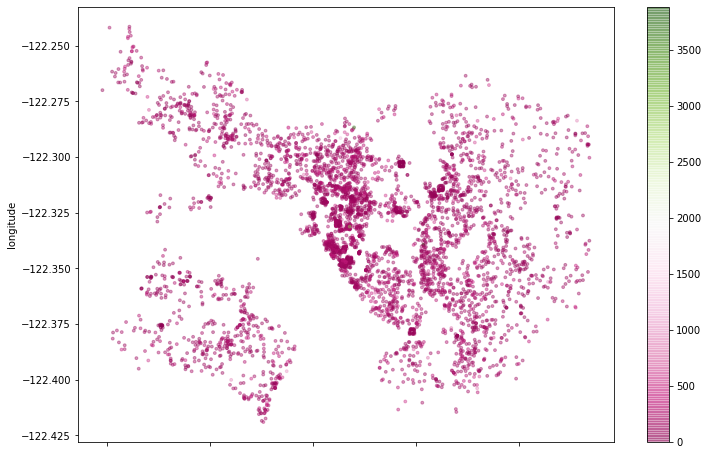

In [ ]:
# plotar os imóveis pela latitude-longitude
df.plot(kind='scatter', x='latitude', y='longitude', alpha=0.4, c=df['price'], s=8, cmap=plt.get_cmap('PiYG'), figsize=(12,8))

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()

13.771660264618012

## Conclusões


Analisando o dataset do Airbnb da cidade de Seattle podemos chegar a algumas conclusões, a saber:
* A média de preço dos aluguéis da cidade é de $158
* 82% dos imóveis disponíveis são do tipo "casas/apartamentos inteiros"
* A média de imóveis por anfitrião chega a 17
* A média da quantidade mínima de noites é de 13

Seattle é a cidade mais populosa do Estado de Washington e está entre as 15 maiores metrópoles dos EUA. Um grande centro financeiro, comercial, industrial e turístico e considerada uma cidade global.

Além disso, faz parte de um grupo de cidades conhecido como *Welcome America*, que visa incluir os imigrantes na sociedade, de forma que eles tenham a oportunidade de contribuir para o crescimento do país e que sintam-se pertencendo à comunidade local.

Estas características revelam a alta concentração de imóveis para locação no Airbnb sendo, inclusive, elevada a média de imóveis por anfitrião na cidade.

Em uma cidade desse porte, que é berço de empresas como Microsoft e Amazon, é de se esperar um mercado imobiliário aquecido. Com o Airbnb não poderia ser diferente, afinal, são milhares de pessoas indo para lá a passeio e/ou a trabalho a todo tempo!






